# Approximate the sine function with a polynomial of degree 3

In this notebook, we will be gradually moving up in the abstraction ladder:
- 1. Bare Numpy (You need to compute the gradient by hand)
- 2. Bare Pytorch (You still need to compute the gradient by hand)
- 3. Autograd (Here you do not need to compute the gradient by hand anymore)
- 4. torch.nn (Using the nn Abstraction in pytorch)
- 5. Optimizer Abstraction (Finally, we don't even need to iterate on the parameters to update them)

Si vous avez des difficultés, aidez vous de la solution: https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

## Tensors
### Warm-up: numpy
Before introducing PyTorch, we will first implement the network using numpy.

Numpy provides an n-dimensional array object, and many functions for manipulating these arrays. Numpy is a generic framework for scientific computing; it does not know anything about computation graphs, or deep learning, or gradients. However we can easily use numpy to fit a third order polynomial to sine function by manually implementing the forward and backward passes through the network using numpy operations:

If you are not familiar with numpy, you can read this cheat sheet: https://www.datacamp.com/cheat-sheet/numpy-cheat-sheet-data-analysis-in-python

99 0.4830546626710792
199 0.3223882119704441
299 0.21571745971883607
399 0.14487596107608497
499 0.09781585982865902
599 0.0665444027426076
699 0.04575790636673072
799 0.03193623602779054
899 0.02274245093070649
999 0.016624702020904138
1099 0.012552196184679967
1199 0.009840043000670953
1299 0.008033038674134593
1399 0.006828537950571902
1499 0.0060252548774488235
1599 0.005489266988080164
1699 0.005131436271489439
1799 0.004892408521744487
1899 0.004732644433483209
1999 0.004625792476606772
Result: y = -0.009995518990687326 + 0.8748029667031766 x + 0.0017243933520475034 x^2 + -0.0958995688405235 x^3


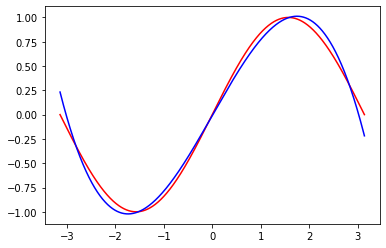

In [31]:
from statistics import mean
import numpy as np
import math
import matplotlib.pyplot as plt

# Create random input and output data
x = np.linspace(-math.pi, math.pi, 2000)
y = np.sin(x)

# Randomly initialize weights
a = np.random.randn()
b = np.random.randn()
c = np.random.randn()
d = np.random.randn()

learning_rate = 1e-6
epochs = 2000
for t in range(epochs):
    # Forward pass: compute predicted y
    # y = a + b x + c x^2 + d x^3
    y_pred = a+b*x+c*x**2+d*x**3

    # Compute and print loss (Mean squared Error)
    loss = np.square(y_pred - y).mean()
    if t % 100 == 99:
        print(t, loss)

    # compute the gradients of the loss wrt a, b, c, d
    grad_a =2*(y_pred-y)
    grad_b = (grad_a*x)
    grad_c = (grad_a*x**2)
    grad_d = (grad_a*x**3)

    # Update weights
    a = a-learning_rate*grad_a.sum()
    b = b-learning_rate*grad_b.sum()
    c = c-learning_rate*grad_c.sum()
    d = d-learning_rate*grad_d.sum()

print(f'Result: y = {a} + {b} x + {c} x^2 + {d} x^3')

prediction = a+b*x+c*x**2+d*x**3
plt.plot(x,y,'r')
plt.plot(x,prediction,'b')
plt.show()

Interpreter les resultats. Si les resultats sont corrects, passer à l'exercice suivant.

### PyTorch: Tensors
Numpy is a great framework, but it cannot utilize GPUs to accelerate its numerical computations. For modern deep neural networks, GPUs often provide speedups of 50x or greater, so unfortunately numpy won’t be enough for modern deep learning.

Here we introduce the most fundamental PyTorch concept: the Tensor. A PyTorch Tensor is conceptually identical to a numpy array: a Tensor is an n-dimensional array, and PyTorch provides many functions for operating on these Tensors. Behind the scenes, Tensors can keep track of a computational graph and gradients, but they’re also useful as a generic tool for scientific computing.

Also unlike numpy, PyTorch Tensors can utilize GPUs to accelerate their numeric computations. To run a PyTorch Tensor on GPU, you simply need to specify the correct device.

Here we use PyTorch Tensors to fit a third order polynomial to sine function. Like the numpy example above we need to manually implement the forward and backward passes through the network:

Vous pouvez checker la pytorch cheat cheet pour se remettre dans le bain : https://pytorch.org/tutorials/beginner/ptcheat.html

## Autograd
### PyTorch: Tensors and autograd
In the above examples, we had to manually implement both the forward and backward passes of our neural network. Manually implementing the backward pass is not a big deal for a small two-layer network, but can quickly get very hairy for large complex networks.

Thankfully, we can use automatic differentiation to automate the computation of backward passes in neural networks. The autograd package in PyTorch provides exactly this functionality. When using autograd, the forward pass of your network will define a computational graph; nodes in the graph will be Tensors, and edges will be functions that produce output Tensors from input Tensors. Backpropagating through this graph then allows you to easily compute gradients.

This sounds complicated, it’s pretty simple to use in practice. Each Tensor represents a node in a computational graph. If x is a Tensor that has x.requires_grad=True then x.grad is another Tensor holding the gradient of x with respect to some scalar value.

Here we use PyTorch Tensors and autograd to implement our fitting sine wave with third order polynomial example; now we no longer need to manually implement the backward pass through the network:

99 0.2975912392139435
199 0.24323691427707672
299 0.20021004974842072
399 0.16496896743774414
499 0.13609880208969116
599 0.11244327574968338
699 0.09305650740861893
799 0.07716507464647293
899 0.06413598358631134
999 0.0534515343606472
1099 0.04468784108757973
1199 0.03749801591038704
1299 0.03159814700484276
1399 0.02675570547580719
1499 0.02278031036257744
1599 0.019515851512551308
1699 0.016834590584039688
1799 0.014631849713623524
1899 0.01282172929495573
1999 0.011333948001265526
Result: y = 0.07491590827703476 + 0.7651971578598022 x + -0.01292424276471138 x^2 + -0.08030910044908524 x^3


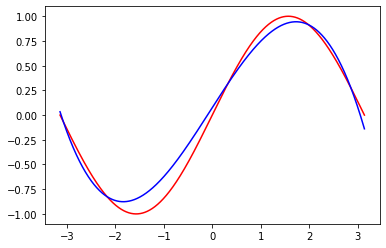

In [39]:
# Here You must use AUTOGRAD, ie, no need to calculate by hand the gradient.
import torch
import math

dtype = torch.float
device = torch.device("cpu")
# device = torch.device("cuda:0")  # Uncomment this to run on GPU

# Create Tensors to hold input and outputs.
# By default, requires_grad=False, which indicates that we do not need to
# compute gradients with respect to these Tensors during the backward pass.
x = torch.linspace(-math.pi, math.pi, 2000, device=device, dtype=dtype)
y = torch.sin(x)

# Create random Tensors for weights. For a third order polynomial, we need
# 4 weights: y = a + b x + c x^2 + d x^3
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
a = torch.randn((), device=device, dtype=dtype, requires_grad=True)
b = torch.randn((), device=device, dtype=dtype, requires_grad=True)
c = torch.randn((), device=device, dtype=dtype, requires_grad=True)
d = torch.randn((), device=device, dtype=dtype, requires_grad=True)

learning_rate = 1e-3
for t in range(epochs):
    # Forward pass: compute predicted y using operations on Tensors. (same as above)
    y_pred = a+b*x+c*x**2+d*x**3

    # Compute and print loss using operations on Tensors.
    # Now loss is a Tensor of shape (1,)
    # loss.item() gets the scalar value held in the loss.
    loss = (y_pred - y).pow(2).mean()
    if t % 100 == 99:
        print(t, loss.item())

    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Tensors with requires_grad=True.
    # After this call a.grad, b.grad. c.grad and d.grad will be Tensors holding
    # the gradient of the loss with respect to a, b, c, d respectively.
    loss.backward()

    # Manually update weights using gradient descent. Wrap in torch.no_grad()
    # because weights have requires_grad=True, but we don't need to track this
    # in autograd.
    with torch.no_grad():
        a -= torch.mean(a.grad)*learning_rate
        b -= torch.mean(b.grad)*learning_rate
        c -= torch.mean(c.grad)*learning_rate
        d -= torch.mean(d.grad)*learning_rate

        # Manually zero the gradients after updating weights
        a.grad = None
        b.grad = None
        c.grad = None
        d.grad = None

print(f'Result: y = {a.item()} + {b.item()} x + {c.item()} x^2 + {d.item()} x^3')

prediction = a.item()+b.item()*x+c.item()*x**2+d.item()*x**3
plt.plot(x,y,'r')
plt.plot(x,prediction,'b')
plt.show()

## nn module
### PyTorch: nn
Computational graphs and autograd are a very powerful paradigm for defining complex operators and automatically taking derivatives; however for large neural networks raw autograd can be a bit too low-level.

When building neural networks we frequently think of arranging the computation into layers, some of which have learnable parameters which will be optimized during learning.

In TensorFlow, packages like Keras, TensorFlow-Slim, and TFLearn provide higher-level abstractions over raw computational graphs that are useful for building neural networks.

In PyTorch, the nn package serves this same purpose. The nn package defines a set of Modules, which are roughly equivalent to neural network layers. A Module receives input Tensors and computes output Tensors, but may also hold internal state such as Tensors containing learnable parameters. The nn package also defines a set of useful loss functions that are commonly used when training neural networks.

In this example we use the nn package to implement our polynomial model network:

99 856.7481079101562
199 572.91845703125
299 384.2403259277344
399 258.77191162109375
499 175.30706787109375
599 119.76307678222656
699 82.78483581542969
799 58.15622329711914
899 41.74535369873047
999 30.805204391479492
1099 23.508378982543945
1199 18.638940811157227
1299 15.38774299621582
1399 13.215694427490234
1499 11.763723373413086
1599 10.792488098144531
1699 10.142382621765137
1799 9.706948280334473
1899 9.41507339477539
1999 9.219286918640137
Result: y = 0.010736803524196148 + 0.8399254679679871 x + -0.0018522776663303375 x^2 + -0.09093854576349258 x^3


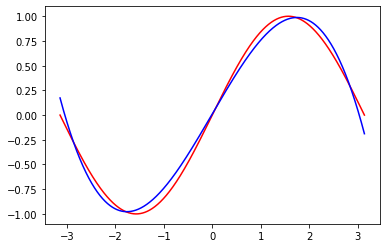

In [46]:
# Complete the ??? and the ...
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)                            
# In the above code, 
# x.unsqueeze(-1) has shape  (2000,1)
# p has shape (3,) 
# For this case, broadcasting semantics will apply to obtain a tensor
# xx of shape (2000, 3) as required.

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),                  
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate*param.grad

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

prediction = linear_layer.bias.item()+linear_layer.weight[:, 0].item()*x+linear_layer.weight[:, 1].item()*x**2+linear_layer.weight[:, 2].item()*x**3
plt.plot(x,y,'r')
plt.plot(x,prediction,'b')
plt.show()

## PyTorch: optim
Up to this point we have updated the weights of our models by manually mutating the Tensors holding learnable parameters with torch.no_grad(). This is not a huge burden for simple optimization algorithms like stochastic gradient descent, but in practice we often train neural networks using more sophisticated optimizers like AdaGrad, RMSProp, Adam, etc.

The optim package in PyTorch abstracts the idea of an optimization algorithm and provides implementations of commonly used optimization algorithms.

In this example we will use the nn package to define our model as before, but we will optimize the model using the RMSprop algorithm provided by the optim package:

99 479.3719787597656
199 321.3416748046875
299 216.44361877441406
399 146.79641723632812
499 100.54151153564453
599 69.81352233886719
699 49.39414978027344
799 35.82073211669922
899 26.79503631591797
999 20.79119300842285
1099 16.795917510986328
1199 14.136272430419922
1299 12.364916801452637
1399 11.184722900390625
1499 10.397995948791504
1599 9.873307228088379
1699 9.523210525512695
1799 9.289449691772461
1899 9.133298873901367
1999 9.02891731262207
Result: y = -0.006808675825595856 + 0.8440524935722351 x + 0.001174609293229878 x^2 + -0.09152557700872421 x^3


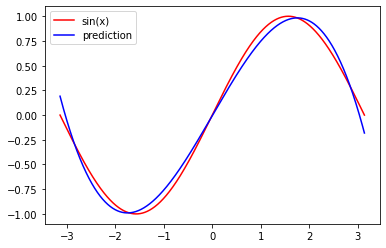

In [49]:
# Complete the ??? and the ...
from pickletools import optimize
import torch
import math


# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)

# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)                            
# In the above code, 
# x.unsqueeze(-1) has shape  (2000,1)
# p has shape (3,) 
# For this case, broadcasting semantics will apply to obtain a tensor
# xx of shape (2000, 3) as required.

# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),                  
    torch.nn.Flatten(0, 1)
)

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate = 1e-6
for t in range(epochs):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if t % 100 == 99:
        print(t, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    optimizer=torch.optim.SGD(model.parameters(),lr=learning_rate)
    optimizer.step()
    
# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

# For linear layer, its parameters are stored as `weight` and `bias`.
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

prediction = linear_layer.bias.item()+linear_layer.weight[:, 0].item()*x+linear_layer.weight[:, 1].item()*x**2+linear_layer.weight[:, 2].item()*x**3
plt.plot(x,y,'r', label='sin(x)')
plt.plot(x,prediction,'b',label='prediction')
plt.legend()
plt.show()